In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
import matplotlib
%matplotlib inline

In [2]:
def Yuchuli(B_data,B_event):
    B_matrix = []
    for i in B_event:
        if i[0]==100:
            B_matrix.append(B_data[(i[1]-510):i[1]])
    B_matrix = np.array(B_matrix)
    Bmatrix = np.zeros((20,5,510))
    for i in range(B_matrix.shape[0]):
        for j in range(B_matrix.shape[1]):
            for k in range(B_matrix.shape[2]):
                Bmatrix[k,i,j] = B_matrix[i,j,k]
    for i in range(Bmatrix.shape[0]):
        for j in range(Bmatrix.shape[1]):
            Bmatrix[i,j] = Bmatrix[i,j]-np.mean(Bmatrix[i,j])
    for i in range(Bmatrix.shape[0]):
        for j in range(Bmatrix.shape[1]):
            Bmatrix[i,j] = WaveNoise(Bmatrix[i,j])
            Bmatrix[i,j] = (Bmatrix[i,j]-np.min(Bmatrix[i,j]))/(np.max(Bmatrix[i,j]-np.min(Bmatrix[i,j])))
    Bdata = np.zeros((5,510,20))
    for i in range(Bmatrix.shape[0]):
        for j in range(Bmatrix.shape[1]):
            for k in range(Bmatrix.shape[2]):
                Bdata[j,k,i] = Bmatrix[i,j,k]
    return Bdata
def WaveNoise(data):
    # Create wavelet object and define parameters
    w = pywt.Wavelet('sym5')  # 选用Daubechies8小波
    maxlev = pywt.dwt_max_level(len(data), w.dec_len)
    threshold = 0.04  # Threshold for filtering

    # Decompose into wavelet components, to the level selected:
    coeffs = pywt.wavedec(data, 'db8', level=maxlev)  # 将信号进行小波分解
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))  # 将噪声滤波

    datarec = pywt.waverec(coeffs, 'db8')  # 将信号进行小波重构
    return datarec

In [154]:
s1_train_data_path = './data/S5/S5_train_data.xlsx'
s1_train_event_path = './data/S5/S5_train_event.xlsx'
s1_test_data_path = './data/S5/S5_test_data.xlsx'
s1_test_event_path = './data/S5/S5_test_event.xlsx'

In [ ]:
s1_train_data_path = './data/S1/S1_train_data.xlsx'
s1_train_event_path = './data/S1/S1_train_event.xlsx'
s1_test_data_path = './data/S1/S1_test_data.xlsx'
s1_test_event_path = './data/S1/S1_test_event.xlsx'

In [155]:
train_x = []
train_y = []

In [156]:
test_x = []
test_y = []

In [157]:
for j in range(12):
    s1_train_data_df = pd.read_excel(s1_train_data_path, sheet_name=j, header=None)
    s1_train_event_df = pd.read_excel(s1_train_event_path, sheet_name=j, header=None)

    s1_train_data_np = s1_train_data_df.to_numpy()
    s1_train_event_np = s1_train_event_df.to_numpy()

    y = s1_train_event_np[0][0]
    data = Yuchuli(s1_train_data_np, s1_train_event_np)

    train_x.append(data)
    train_y.append(y)

In [158]:
for j in range(10):
    s1_test_data_df = pd.read_excel(s1_test_data_path, sheet_name=j, header=None)
    s1_test_event_df = pd.read_excel(s1_test_event_path, sheet_name=j, header=None)

    s1_test_data_np = s1_test_data_df.to_numpy()
    s1_test_event_np = s1_test_event_df.to_numpy()
    
    data = Yuchuli(s1_test_data_np, s1_test_event_np)
    y = s1_test_event_np[0][0]
    
    test_x.append(data)
    test_y.append(y)

In [77]:
for j in range(10):
    s1_test_data_df = pd.read_excel(s1_test_data_path, sheet_name=j, header=None)
    s1_test_event_df = pd.read_excel(s1_test_event_path, sheet_name=j, header=None)

    s1_test_data_np = s1_test_data_df.to_numpy()
    s1_test_event_np = s1_test_event_df.to_numpy()

    y = s1_test_event_np[0][0]
    t1 = s1_test_event_np[0][1]

    idx = s1_test_event_np[1:].reshape(5, -1, 2)

    res = []
    for i in idx:
        a = s1_test_data_df.iloc[t1 - 1: int(i[-1:, 1]), :].to_numpy()
#         print(a.shape)
        a = a[-510:, :]
        res.append(a)
        t1 = int(i[-1:, 1])
#         print(a.shape)
    res = np.array(res)
    test_x.append(res)
    test_y.append(y)

In [78]:
for j in range(12):
    s1_train_data_df = pd.read_excel(s1_train_data_path, sheet_name=j, header=None)
    s1_train_event_df = pd.read_excel(s1_train_event_path, sheet_name=j, header=None)

    s1_train_data_np = s1_train_data_df.to_numpy()
    s1_train_event_np = s1_train_event_df.to_numpy()

    y = s1_train_event_np[0][0]
    t1 = s1_train_event_np[0][1]

    idx = s1_train_event_np[1:].reshape(5, -1, 2)

    res = []
    for i in idx:
        a = s1_train_data_df.iloc[t1 - 1: int(i[-1:, 1]), :].to_numpy()
        #     print(a.head())
        a = a[-510:, :]
        res.append(a)
        t1 = int(i[-1:, 1])
#         print(a.shape)
    res = np.array(res)
    train_x.append(res)
    train_y.append(y)

In [159]:
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)

In [160]:
train_x.shape

(12, 5, 510, 20)

In [161]:
np.save("s5_train_y.npy",train_y)
np.save("s5_train_x_preprocess.npy",train_x)
np.save("s5_test_x_preprocess.npy",test_x)

In [41]:
train_x = np.load("s1_train_x_no_preprocess.npy")
train_y = np.load("s1_train_y.npy")
test_x = np.load("s1_test_x_no_preprocess.npy")

In [65]:
train_x = np.load("s1_train_x_preprocess.npy")
train_y = np.load("s1_train_y.npy")
test_x = np.load("s1_test_x_preprocess.npy")

In [206]:
train_x = np.load("s2_train_x_preprocess.npy")
train_y = np.load("s2_train_y.npy")
test_x = np.load("s2_test_x_preprocess.npy")

In [175]:
train_x = np.load("s4_train_x_preprocess.npy")
train_y = np.load("s4_train_y.npy")
test_x = np.load("s4_test_x_preprocess.npy")

In [191]:
train_x = np.load("s5_train_x_preprocess.npy")
train_y = np.load("s5_train_y.npy")
test_x = np.load("s5_test_x_preprocess.npy")

In [207]:
res = []
for i in train_y:
    res.append(i - 101)
res = np.array(res)

In [208]:
res

array([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34], dtype=int64)

In [194]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable

In [195]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(       #(1*28*28)
                in_channels=5,
                out_channels=1,
                kernel_size=(5, 1),
                stride=1, #步长
#                 padding=2,
            ),    #(16*28*28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),#( 3, 253, 10)
        )

        self.out = nn.Linear(1*253*10,36)  #全连接

    def forward(self, x):
        x = self.conv1(x)
        print(x.shape)
        x = x.view(x.size(0),-1) #(batch,32*7*7)
        print(x.shape)
        output = self.out(x)
        return output

In [203]:
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2,self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(       #(1*28*28)
                in_channels=5,
                out_channels=3,
                kernel_size=(5, 1),
                stride=1, #步长
#                 padding=2,
            ),    #(16*28*28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),#(16*14*14)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(       #(1*28*28)
                in_channels=3,
                out_channels=1,
                kernel_size=(5, 1),
                stride=1, #步长
#                 padding=2,
            ),    #(16*28*28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),#(16*14*14)
        )

        self.out = nn.Linear(1*124*5,36)  #全连接

    def forward(self, x):
        x = self.conv1(x)
        print(x.shape)
        x = self.conv2(x)
        print(x.shape)
        x = x.view(x.size(0),-1) #(batch,32*7*7)
        print(x.shape)
        output = self.out(x)
        return output

In [209]:
class CNN3(nn.Module):
    def __init__(self):
        super(CNN3,self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(       #(1*28*28)
                in_channels=5,
                out_channels=3,
                kernel_size=(5, 1),
                stride=1, #步长
#                 padding=2,
            ),    #(16*28*28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),#(16*14*14)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(       #(1*28*28)
                in_channels=3,
                out_channels=1,
                kernel_size=(5, 1),
                stride=1, #步长
#                 padding=2,
            ),    #(16*28*28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),#(1*124*5)
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(       #(1*28*28)
                in_channels=1,
                out_channels=16,
                kernel_size=(5, 1),
                stride=1, #步长
#                 padding=2,
            ),    #(16*28*28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),#(16, 60, 2)
        )

        self.out = nn.Linear(16*60*2,36)  #全连接

    def forward(self, x):
        x = self.conv1(x)
        print(x.shape)
        x = self.conv2(x)
        print(x.shape)
        x = self.conv3(x)
        print(x.shape)
        x = x.view(x.size(0),-1) #(batch,32*7*7)
        print(x.shape)
        output = self.out(x)
        return output

In [196]:
train_t = torch.tensor(train_x).float()
train_y_t = torch.tensor(res).long()

In [197]:
EPOCH = 1000
LR = 0.001

In [198]:
cnn = CNN()
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()
s5_losses = []
for epoch in range(EPOCH):
    correct = 0
    output  = cnn(train_t)
    loss = loss_func(output, train_y_t)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    predicted = torch.max(output.data, 1)[1]
    print(predicted)
    correct += (predicted == train_y_t).sum()
    print('Epoch : {} | Loss: {:.6f}\t'.format(epoch, loss.item()))
    s5_losses.append(loss.item())
#     print('Epoch: ',epoch,'| train loss: ',loss)

torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 7, 12, 10, 10, 27,  4, 12, 12, 10, 22, 12, 12])
Epoch : 0 | Loss: 3.619029	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 6, 18,  6,  6,  6,  6,  6,  6, 11, 32,  6,  6])
Epoch : 1 | Loss: 3.211610	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([11, 18,  6, 11,  6,  6, 18,  6, 11, 32, 32,  6])
Epoch : 2 | Loss: 2.880058	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([14,  3,  6, 11, 14, 16, 18,  6, 11, 32, 32, 32])
Epoch : 3 | Loss: 2.628489	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([14,  3,  6, 11, 14, 16, 18, 14, 11, 32, 32,  3])
Epoch : 4 | Loss: 2.452308	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([14,  3,  6, 11, 14, 16, 18, 14, 25, 32, 32, 14])
Epoch : 5 | Loss: 2.327369	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([14,  3,  6, 11, 14, 16, 18, 14, 25, 29, 32, 34])
Epoch : 6 | Loss: 2.228812	
torch.Size([12, 1, 253, 10])
torch.Size([

tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 59 | Loss: 0.017005	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 60 | Loss: 0.016278	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 61 | Loss: 0.015616	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 62 | Loss: 0.015012	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 63 | Loss: 0.014458	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 64 | Loss: 0.013950	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 65 | Loss: 0.013483	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18

tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 118 | Loss: 0.005506	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 119 | Loss: 0.005446	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 120 | Loss: 0.005386	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 121 | Loss: 0.005328	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 122 | Loss: 0.005270	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 123 | Loss: 0.005214	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 124 | Loss: 0.005158	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14,

torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 177 | Loss: 0.003150	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 178 | Loss: 0.003124	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 179 | Loss: 0.003099	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 180 | Loss: 0.003074	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 181 | Loss: 0.003049	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 182 | Loss: 0.003025	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 183 | Loss: 0.003001	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tens

torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 236 | Loss: 0.002049	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 237 | Loss: 0.002035	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 238 | Loss: 0.002022	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 239 | Loss: 0.002009	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 240 | Loss: 0.001996	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 241 | Loss: 0.001983	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 242 | Loss: 0.001971	
torch.Size([12, 1, 253, 10]

Epoch : 294 | Loss: 0.001452	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 295 | Loss: 0.001444	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 296 | Loss: 0.001437	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 297 | Loss: 0.001429	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 298 | Loss: 0.001421	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 299 | Loss: 0.001414	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 300 | Loss: 0.001406	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 301 | Loss: 0.00139

tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 353 | Loss: 0.001082	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 354 | Loss: 0.001077	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 355 | Loss: 0.001072	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 356 | Loss: 0.001067	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 357 | Loss: 0.001062	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 358 | Loss: 0.001057	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 359 | Loss: 0.001052	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14,

torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 412 | Loss: 0.000839	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 413 | Loss: 0.000835	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 414 | Loss: 0.000832	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 415 | Loss: 0.000829	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 416 | Loss: 0.000825	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 417 | Loss: 0.000822	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 418 | Loss: 0.000819	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tens

torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 471 | Loss: 0.000670	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 472 | Loss: 0.000668	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 473 | Loss: 0.000665	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 474 | Loss: 0.000663	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 475 | Loss: 0.000661	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 476 | Loss: 0.000658	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 477 | Loss: 0.000656	
torch.Size([12, 1, 253, 10]

Epoch : 529 | Loss: 0.000550	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 530 | Loss: 0.000549	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 531 | Loss: 0.000547	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 532 | Loss: 0.000545	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 533 | Loss: 0.000543	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 534 | Loss: 0.000542	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 535 | Loss: 0.000540	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 536 | Loss: 0.00053

tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 588 | Loss: 0.000459	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 589 | Loss: 0.000458	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 590 | Loss: 0.000456	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 591 | Loss: 0.000455	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 592 | Loss: 0.000454	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 593 | Loss: 0.000452	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 594 | Loss: 0.000451	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14,

torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 647 | Loss: 0.000389	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 648 | Loss: 0.000388	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 649 | Loss: 0.000387	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 650 | Loss: 0.000386	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 651 | Loss: 0.000385	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 652 | Loss: 0.000384	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 653 | Loss: 0.000383	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tens

torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 706 | Loss: 0.000334	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 707 | Loss: 0.000333	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 708 | Loss: 0.000332	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 709 | Loss: 0.000331	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 710 | Loss: 0.000330	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 711 | Loss: 0.000330	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 712 | Loss: 0.000329	
torch.Size([12, 1, 253, 10]

Epoch : 764 | Loss: 0.000290	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 765 | Loss: 0.000290	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 766 | Loss: 0.000289	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 767 | Loss: 0.000288	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 768 | Loss: 0.000288	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 769 | Loss: 0.000287	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 770 | Loss: 0.000286	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 771 | Loss: 0.00028

tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 823 | Loss: 0.000254	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 824 | Loss: 0.000254	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 825 | Loss: 0.000253	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 826 | Loss: 0.000253	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 827 | Loss: 0.000252	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 828 | Loss: 0.000251	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 829 | Loss: 0.000251	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14,

torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 882 | Loss: 0.000224	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 883 | Loss: 0.000224	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 884 | Loss: 0.000223	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 885 | Loss: 0.000223	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 886 | Loss: 0.000223	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 887 | Loss: 0.000222	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 888 | Loss: 0.000222	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tens

torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 941 | Loss: 0.000200	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 942 | Loss: 0.000199	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 943 | Loss: 0.000199	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 944 | Loss: 0.000198	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 945 | Loss: 0.000198	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 946 | Loss: 0.000198	
torch.Size([12, 1, 253, 10])
torch.Size([12, 2530])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 947 | Loss: 0.000197	
torch.Size([12, 1, 253, 10]

Epoch : 999 | Loss: 0.000179	


In [204]:
cnn = CNN2()
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()
s5_losses2 = []
for epoch in range(EPOCH):
    correct = 0
    output  = cnn(train_t)
    loss = loss_func(output, train_y_t)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    predicted = torch.max(output.data, 1)[1]
    print(predicted)
    correct += (predicted == train_y_t).sum()
    print('Epoch : {} | Loss: {:.6f}\t'.format(epoch, loss.item()))
    s5_losses2.append(loss.item())
#     print('Epoch: ',epoch,'| train loss: ',loss)

torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33])
Epoch : 0 | Loss: 3.572332	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25])
Epoch : 1 | Loss: 3.515437	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25])
Epoch : 2 | Loss: 3.459104	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25])
Epoch : 3 | Loss: 3.403375	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25])
Epoch : 4 | Loss: 3.348389	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25])
Epoch : 5 | Loss: 3.294316	
torch.Size([12, 

tensor([ 3,  3, 11, 11, 14,  3, 11, 14,  3, 11,  3, 11])
Epoch : 49 | Loss: 2.468103	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 3,  3, 11, 11, 14, 16, 11, 14,  3, 11, 32, 11])
Epoch : 50 | Loss: 2.462843	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 3,  3, 11, 11, 14, 16, 11, 16,  3, 11, 32, 11])
Epoch : 51 | Loss: 2.457199	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 3,  3, 11, 11, 14, 16, 11, 16,  3, 11, 32, 11])
Epoch : 52 | Loss: 2.451085	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 3,  3, 11, 11, 14, 16, 11, 21,  3, 11, 32, 11])
Epoch : 53 | Loss: 2.444374	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 3,  3, 11, 11, 14, 16, 11, 21,  3,  3, 32, 11])
Epoch : 54 | Loss: 2.436943	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 3

torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 99 | Loss: 0.278264	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 100 | Loss: 0.240172	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 101 | Loss: 0.206934	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 102 | Loss: 0.178169	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 103 | Loss: 0.153453	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 104 | Loss: 0.132337	
torch

torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 148 | Loss: 0.007615	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 149 | Loss: 0.007477	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 150 | Loss: 0.007345	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 151 | Loss: 0.007219	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 152 | Loss: 0.007099	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 153 | Loss: 0.006984	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torc

tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 197 | Loss: 0.004182	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 198 | Loss: 0.004142	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 199 | Loss: 0.004104	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 200 | Loss: 0.004066	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 201 | Loss: 0.004028	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 202 | Loss: 0.003992	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tens

Epoch : 246 | Loss: 0.002780	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 247 | Loss: 0.002760	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 248 | Loss: 0.002739	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 249 | Loss: 0.002719	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 250 | Loss: 0.002699	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 251 | Loss: 0.002680	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoc

torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 296 | Loss: 0.001984	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 297 | Loss: 0.001972	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 298 | Loss: 0.001960	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 299 | Loss: 0.001948	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 300 | Loss: 0.001936	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 301 | Loss: 0.001925	
torch.Size([12, 3, 253, 10])
torc

tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 345 | Loss: 0.001502	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 346 | Loss: 0.001494	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 347 | Loss: 0.001486	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 348 | Loss: 0.001478	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 349 | Loss: 0.001471	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 350 | Loss: 0.001463	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tens

Epoch : 394 | Loss: 0.001179	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 395 | Loss: 0.001174	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 396 | Loss: 0.001168	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 397 | Loss: 0.001163	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 398 | Loss: 0.001158	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 399 | Loss: 0.001152	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoc

torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 444 | Loss: 0.000948	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 445 | Loss: 0.000944	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 446 | Loss: 0.000940	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 447 | Loss: 0.000936	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 448 | Loss: 0.000933	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 449 | Loss: 0.000929	
torch.Size([12, 3, 253, 10])
torc

tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 493 | Loss: 0.000783	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 494 | Loss: 0.000780	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 495 | Loss: 0.000777	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 496 | Loss: 0.000774	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 497 | Loss: 0.000771	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 498 | Loss: 0.000768	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tens

Epoch : 542 | Loss: 0.000658	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 543 | Loss: 0.000656	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 544 | Loss: 0.000653	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 545 | Loss: 0.000651	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 546 | Loss: 0.000649	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 547 | Loss: 0.000647	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoc

torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 592 | Loss: 0.000559	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 593 | Loss: 0.000557	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 594 | Loss: 0.000556	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 595 | Loss: 0.000554	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 596 | Loss: 0.000552	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 597 | Loss: 0.000550	
torch.Size([12, 3, 253, 10])
torc

tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 641 | Loss: 0.000482	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 642 | Loss: 0.000481	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 643 | Loss: 0.000480	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 644 | Loss: 0.000478	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 645 | Loss: 0.000477	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 646 | Loss: 0.000476	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tens

Epoch : 690 | Loss: 0.000421	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 691 | Loss: 0.000420	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 692 | Loss: 0.000418	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 693 | Loss: 0.000417	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 694 | Loss: 0.000416	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 695 | Loss: 0.000415	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoc

torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 740 | Loss: 0.000369	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 741 | Loss: 0.000368	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 742 | Loss: 0.000367	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 743 | Loss: 0.000366	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 744 | Loss: 0.000366	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 745 | Loss: 0.000365	
torch.Size([12, 3, 253, 10])
torc

tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 789 | Loss: 0.000327	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 790 | Loss: 0.000327	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 791 | Loss: 0.000326	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 792 | Loss: 0.000325	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 793 | Loss: 0.000324	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 794 | Loss: 0.000324	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tens

Epoch : 838 | Loss: 0.000292	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 839 | Loss: 0.000292	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 840 | Loss: 0.000291	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 841 | Loss: 0.000290	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 842 | Loss: 0.000290	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 843 | Loss: 0.000289	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoc

torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 888 | Loss: 0.000262	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 889 | Loss: 0.000261	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 890 | Loss: 0.000261	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 891 | Loss: 0.000260	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 892 | Loss: 0.000260	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 893 | Loss: 0.000259	
torch.Size([12, 3, 253, 10])
torc

tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 937 | Loss: 0.000236	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 938 | Loss: 0.000236	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 939 | Loss: 0.000235	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 940 | Loss: 0.000235	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 941 | Loss: 0.000235	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 942 | Loss: 0.000234	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tens

Epoch : 986 | Loss: 0.000215	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 987 | Loss: 0.000214	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 988 | Loss: 0.000214	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 989 | Loss: 0.000213	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 990 | Loss: 0.000213	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 991 | Loss: 0.000212	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 620])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoc

In [210]:
cnn = CNN3()
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()
s2_losses3 = []
for epoch in range(EPOCH):
    correct = 0
    output  = cnn(train_t)
    loss = loss_func(output, train_y_t)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    predicted = torch.max(output.data, 1)[1]
    print(predicted)
    correct += (predicted == train_y_t).sum()
    print('Epoch : {} | Loss: {:.6f}\t'.format(epoch, loss.item()))
    s2_losses3.append(loss.item())
#     print('Epoch: ',epoch,'| train loss: ',loss)

torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33])
Epoch : 0 | Loss: 3.631700	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  1,  1, 25, 25, 25,  1, 25,  1,  1, 25, 25])
Epoch : 1 | Loss: 3.339193	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  1,  1, 25, 25, 25,  1, 25,  1,  1, 25, 25])
Epoch : 2 | Loss: 3.095549	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  1, 25, 25, 25, 25,  1, 25,  1,  1, 25, 25])
Epoch : 3 | Loss: 2.903713	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  1, 25, 25, 25,  1,  1, 25,  1,  1, 25, 25])
Epoch : 4 | Loss: 2.762036	
torch.Size([12, 3, 253, 10])
torch.

torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 42 | Loss: 1.351636	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 43 | Loss: 1.272020	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 44 | Loss: 1.190501	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 45 | Loss: 1.107454	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 46 | Loss: 1.023317	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
to

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 84 | Loss: 0.008512	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 85 | Loss: 0.008026	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 86 | Loss: 0.007591	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 87 | Loss: 0.007200	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 88 | Loss: 0.006846	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
to

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 126 | Loss: 0.001372	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 127 | Loss: 0.001321	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 128 | Loss: 0.001272	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 129 | Loss: 0.001225	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 130 | Loss: 0.001179	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 168 | Loss: 0.000155	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 169 | Loss: 0.000146	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 170 | Loss: 0.000137	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 171 | Loss: 0.000129	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 172 | Loss: 0.000122	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 210 | Loss: 0.000025	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 211 | Loss: 0.000025	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 212 | Loss: 0.000024	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 213 | Loss: 0.000023	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 214 | Loss: 0.000023	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 252 | Loss: 0.000011	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 253 | Loss: 0.000011	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 254 | Loss: 0.000011	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 255 | Loss: 0.000011	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 256 | Loss: 0.000011	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 294 | Loss: 0.000007	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 295 | Loss: 0.000007	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 296 | Loss: 0.000007	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 297 | Loss: 0.000006	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 298 | Loss: 0.000006	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 336 | Loss: 0.000005	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 337 | Loss: 0.000004	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 338 | Loss: 0.000004	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 339 | Loss: 0.000004	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 340 | Loss: 0.000004	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 378 | Loss: 0.000003	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 379 | Loss: 0.000003	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 380 | Loss: 0.000003	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 381 | Loss: 0.000003	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 382 | Loss: 0.000003	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 420 | Loss: 0.000003	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 421 | Loss: 0.000003	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 422 | Loss: 0.000003	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 423 | Loss: 0.000002	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 424 | Loss: 0.000002	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 462 | Loss: 0.000002	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 463 | Loss: 0.000002	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 464 | Loss: 0.000002	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 465 | Loss: 0.000002	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 466 | Loss: 0.000002	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 504 | Loss: 0.000002	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 505 | Loss: 0.000002	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 506 | Loss: 0.000002	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 507 | Loss: 0.000002	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 508 | Loss: 0.000002	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 546 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 547 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 548 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 549 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 550 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 588 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 589 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 590 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 591 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 592 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 630 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 631 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 632 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 633 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 634 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 672 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 673 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 674 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 675 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 676 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 714 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 715 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 716 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 717 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 718 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 756 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 757 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 758 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 759 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 760 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 798 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 799 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 800 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 801 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 802 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 840 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 841 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 842 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 843 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 844 | Loss: 0.000001	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 882 | Loss: 0.000000	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 883 | Loss: 0.000000	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 884 | Loss: 0.000000	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 885 | Loss: 0.000000	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 886 | Loss: 0.000000	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 924 | Loss: 0.000000	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 925 | Loss: 0.000000	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 926 | Loss: 0.000000	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 927 | Loss: 0.000000	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 928 | Loss: 0.000000	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 966 | Loss: 0.000000	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 967 | Loss: 0.000000	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 968 | Loss: 0.000000	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 969 | Loss: 0.000000	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2])
torch.Size([12, 1920])
tensor([ 1,  3,  6, 11, 14, 16, 18, 21, 25, 29, 32, 34])
Epoch : 970 | Loss: 0.000000	
torch.Size([12, 3, 253, 10])
torch.Size([12, 1, 124, 5])
torch.Size([12, 16, 60, 2

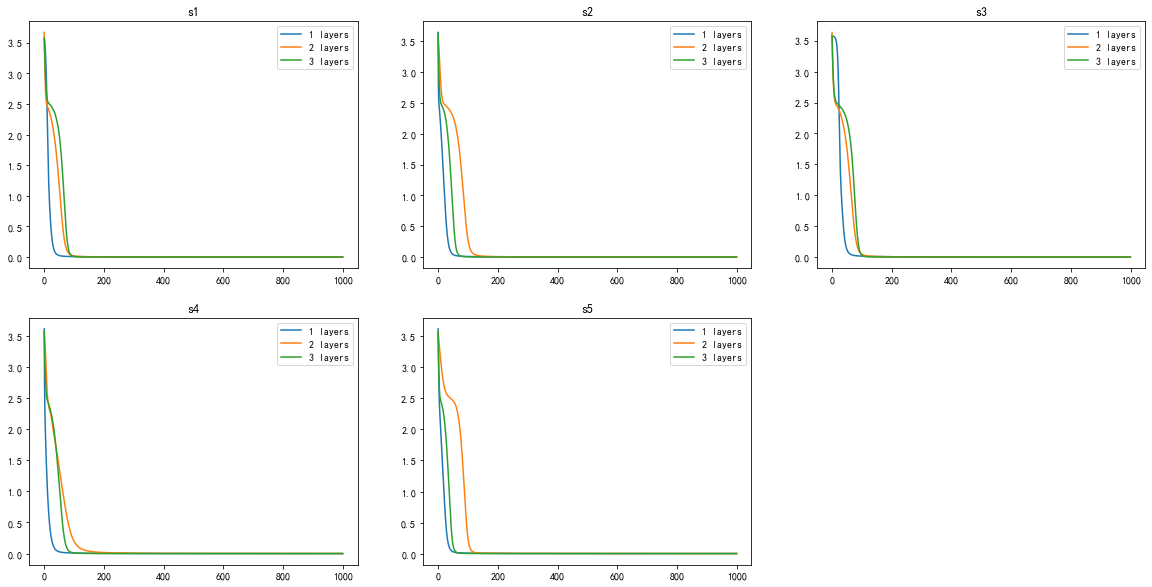

In [226]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.title('s1')
plt.plot(s1_losses, label="1 layers")
plt.plot(s1_losses2, label="2 layers")
plt.plot(s1_losses3, label="3 layers")
plt.legend()

plt.subplot(232)
plt.title('s2')
plt.plot(s2_losses, label="1 layers")
plt.plot(s2_losses2, label="2 layers")
plt.plot(s2_losses3, label="3 layers")
plt.legend()

plt.subplot(233)
plt.title('s3')
plt.plot(s3_losses, label="1 layers")
plt.plot(s3_losses2, label="2 layers")
plt.plot(s3_losses3, label="3 layers")
plt.legend()

plt.subplot(234)
plt.title('s4')
plt.plot(s4_losses, label="1 layers")
plt.plot(s4_losses2, label="2 layers")
plt.plot(s4_losses3, label="3 layers")
plt.legend()
plt.subplot(235)
plt.title('s5')
plt.plot(s5_losses, label="1 layers")
plt.plot(s5_losses2, label="2 layers")
plt.plot(s5_losses3, label="3 layers")
plt.legend()

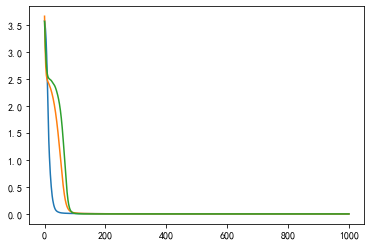

In [124]:
plt.plot(s1_losses, label="a")
plt.plot(s1_losses2, label="b")
plt.plot(s1_losses3, label="c")

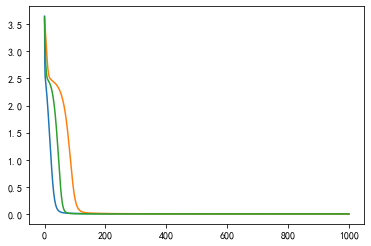

In [212]:
plt.plot(s2_losses, label="a")
plt.plot(s2_losses2, label="b")
plt.plot(s2_losses3, label="c")

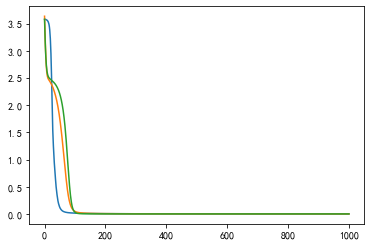

In [213]:
plt.plot(s3_losses, label="a")
plt.plot(s3_losses2, label="b")
plt.plot(s3_losses3, label="c")
# plt.legend()

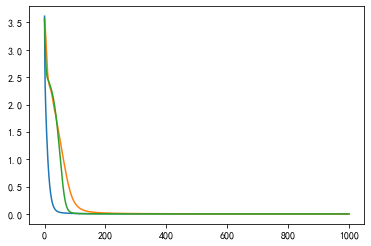

In [214]:
plt.plot(s4_losses, label="a")
plt.plot(s4_losses2, label="b")
plt.plot(s4_losses3, label="c")
# plt.legend()

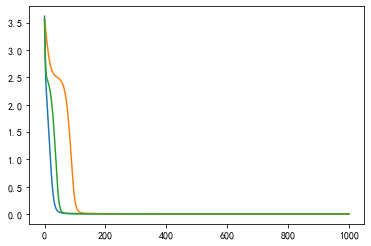

In [215]:
plt.plot(s5_losses, label="a")
plt.plot(s5_losses2, label="b")
plt.plot(s5_losses3, label="c")
# plt.legend()

In [25]:
torch.save(cnn.state_dict(), 's2_preprocess.pkl')

In [ ]:
cnn.load_state_dict(torch.load('no_preprocess.pkl'))

In [26]:
tt = cnn(torch.tensor(test_x).float())
torch.max(tt.data, 1)[1]

torch.Size([9, 1, 253, 10])
torch.Size([9, 2530])


tensor([32,  3, 29, 16, 18, 16,  6, 32, 18])

In [73]:
tt = cnn(torch.tensor(test_x).float())
torch.max(tt.data, 1)[1]

torch.Size([10, 1, 253, 10])
torch.Size([10, 2530])


tensor([16, 14, 11, 11, 16,  3, 11, 11, 16, 32])

In [106]:
tt = cnn(torch.tensor(test_x).float())
torch.max(tt.data, 1)[1]

torch.Size([10, 1, 255, 10])
torch.Size([10, 2550])


tensor([11, 14, 11, 11, 34, 11, 11, 18, 16, 29])

In [61]:
tt = cnn(torch.tensor(test_x).float())
torch.max(tt.data, 1)[1]

torch.Size([10, 1, 254, 10])
torch.Size([10, 2540])


tensor([16, 14, 11,  1, 16, 14, 14, 14, 16,  1])

In [40]:
tt = cnn(torch.tensor(test_x).float())
torch.max(tt.data, 1)[1]

torch.Size([10, 1, 254, 9])
torch.Size([10, 2286])


tensor([32, 18, 34, 34,  3, 21, 34,  1, 18, 18])

In [81]:
tt = cnn(torch.tensor(test_x).float())
torch.max(tt.data, 1)[1]

torch.Size([10, 1, 255, 10])
torch.Size([10, 2550])


tensor([11,  3, 29, 29, 11, 21, 11, 21,  1, 32])

In [121]:
tt = cnn(torch.tensor(test_x).float())
torch.max(tt.data, 1)[1]

torch.Size([10, 1, 255, 10])
torch.Size([10, 2550])


tensor([11,  6, 29, 29,  6, 21, 11, 18,  1, 34])

In [49]:
tt = cnn(torch.tensor(test_x).float())
torch.max(tt.data, 1)[1]

torch.Size([10, 1, 254, 9])
torch.Size([10, 2286])


tensor([11,  6, 32, 32, 11, 16, 11, 18,  1, 34])